# UW Data Science 350
## Winter 2017
### Dave Wine 8430191
### Assignment #8 - Time Series Analysis

# Summary
1. 

In [1]:
### Libraries
require ('repr')
require ('ggplot2')
require ('dplyr')
require ('HistData')
require ('gridExtra')
require ('forecast')

Loading required package: repr
Warning message:
"package 'repr' was built under R version 3.3.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.2"Loading required package: dplyr
Warning message:
"package 'dplyr' was built under R version 3.3.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: HistData
Warning message:
"package 'HistData' was built under R version 3.3.2"Loading required package: gridExtra
Warning message:
"package 'gridExtra' was built under R version 3.3.2"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Loading required package: forecast
Warning message:
"package 'forecast' was built under R version 3.3.2"

In [2]:
### Functions

# File read function
read.datafile = function(file = 'Automobile price data _Raw_.csv',skip=0){
  datafile.data <- read.csv(file, header=TRUE, stringsAsFactors=FALSE,skip=skip)

}

## Plot
dist.ts = function(df, col = 'residual', bins = 40){
  par(mfrow = c(1,2))
  temp = as.vector(df)
  breaks = seq(min(temp), max(temp), length.out = (bins + 1))
  hist(temp, breaks = breaks, main = paste('Distribution of ', col), xlab = col)
  qqnorm(temp, main = paste('Normal Q-Q plot of ', col))
  par(mfrow = c(1,1))
}

## ACF plots
plot.acf <- function(df, col = 'remainder', is.df =TRUE){
  if(is.df) temp <- df[, col]
  else temp <- df
  par(mfrow = c(2,1))
  acf(temp, main = paste('ACF of', col))
  pacf(temp, main = paste('PACF of', col))
  par(mfrow = c(1,1))
}

## Decomposition of the time series into components
ts.decomp <- function(df, col = 'elec.ts', span = 0.5, Mult = TRUE, is.df = TRUE){
  # if(Mult) temp = log(df[, col])  else temp = ts(df[, col]
  if(is.df) temp = log(df[, col])  
  else temp = df
  spans = span * length(temp)  
  fit <- stl(temp, s.window = "periodic", t.window = spans)
  plot(fit, main = paste('Decompositon of',col,'with lowess span = ', as.character(span)))
  fit$time.series
}

## Function for ARIMA model estimation
ts.model = function(ts, col = 'remainder', order = c(0,0,1)){
  mod = arima(ts, order = order, include.mean = FALSE)
  print(mod)
  mod
}


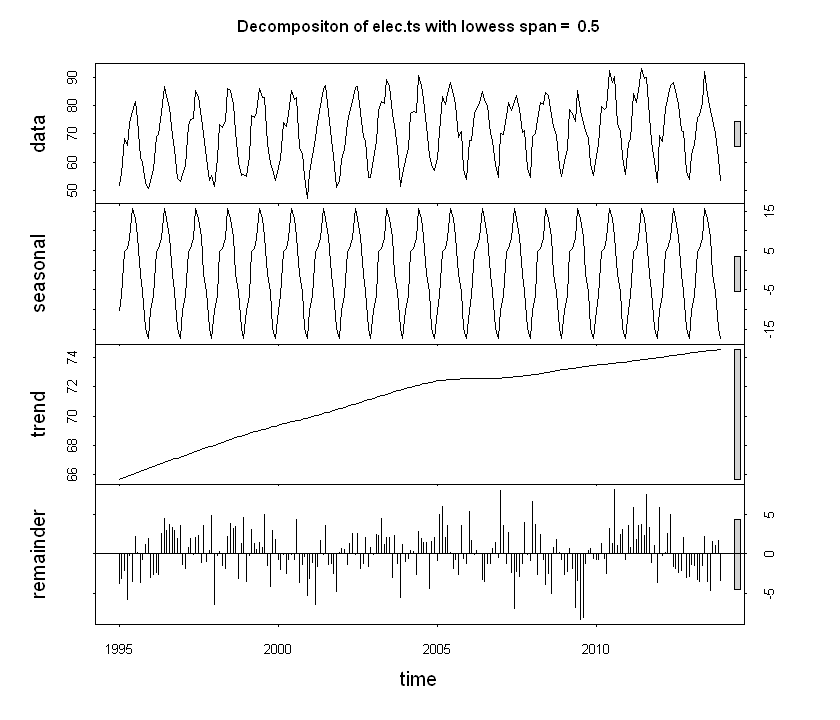

In [4]:
### Main Code
wd <- "C:/Users/Dave/Documents/GitHub/DataScience350/DataScience350/Lecture8/"
setwd(wd)

# Read in dairy data
dairy.data <-read.datafile("CADairyProduction.csv")

## Do ice cream

## STL decomposition
icrm <-ts(dairy.data[,4],start = dairy.data[1,1],freq=12)
icrm.decomp <- ts.decomp(icrm, Mult=TRUE, is.df=FALSE,span =0.5)



The ice cream data is not stationary, and it has a strong seasonal component.

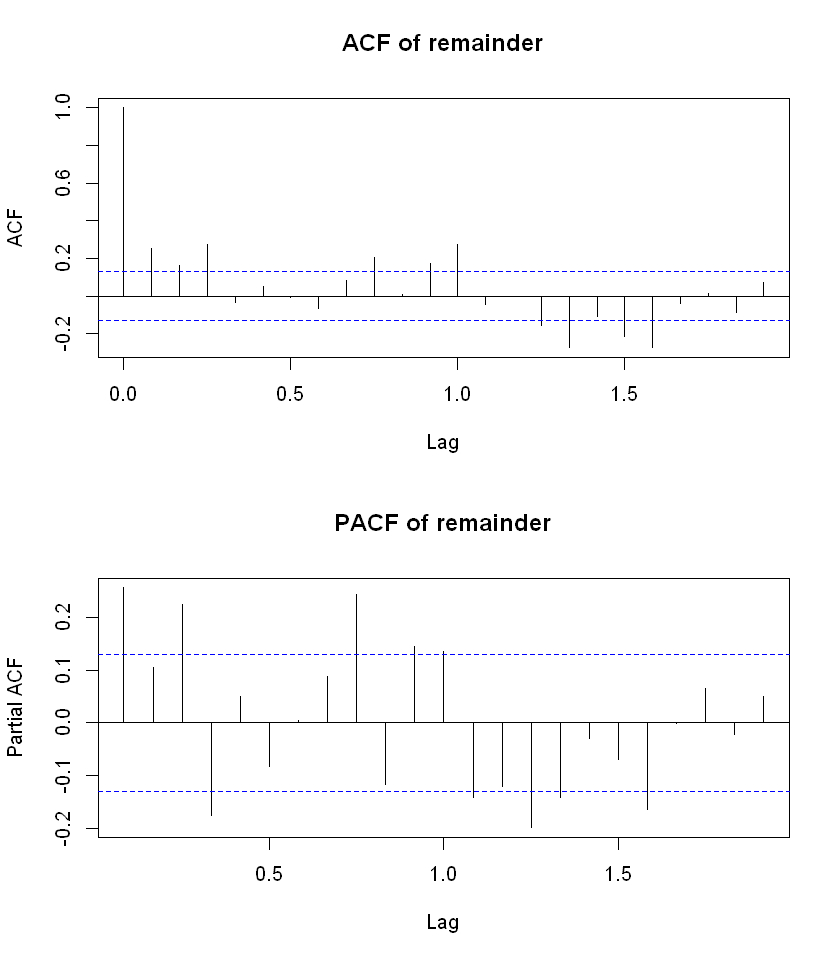

In [6]:
## Plot ACF
options(repr.pmales.extlot.width=8, repr.plot.height=8)
plot.acf(icrm.decomp[, 3], is.df = FALSE)

ACF comments


Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
          ar1      ar2     ma1      ma2
      -0.7101  -0.0315  0.0355  -0.7303
s.e.   0.1029   0.0960  0.0811   0.0821

sigma^2 estimated as 7.798:  log likelihood = -555.87,  aic = 1121.75
Series: icrm 
ARIMA(3,0,1)(1,1,2)[12] with drift         

Coefficients:
          ar1     ar2     ar3     ma1   sar1     sma1     sma2   drift
      -0.3052  0.2177  0.3482  0.5655  0.026  -0.5470  -0.2335  0.0377
s.e.   0.2020  0.0879  0.0648  0.2203  0.224   0.2184   0.1523  0.0101

sigma^2 estimated as 7.711:  log likelihood=-528.05
AIC=1074.11   AICc=1074.98   BIC=1104.49

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.09698592 2.652346 2.052637 0.0563378 2.892051 0.7436829
                     ACF1
Training set -0.005397972

Forecast method: ARIMA(3,0,1)(1,1,2)[12] with drift

Model Information:
Series: icrm 
ARIMA(3,0,1)(1,1,2)[12] with drift         



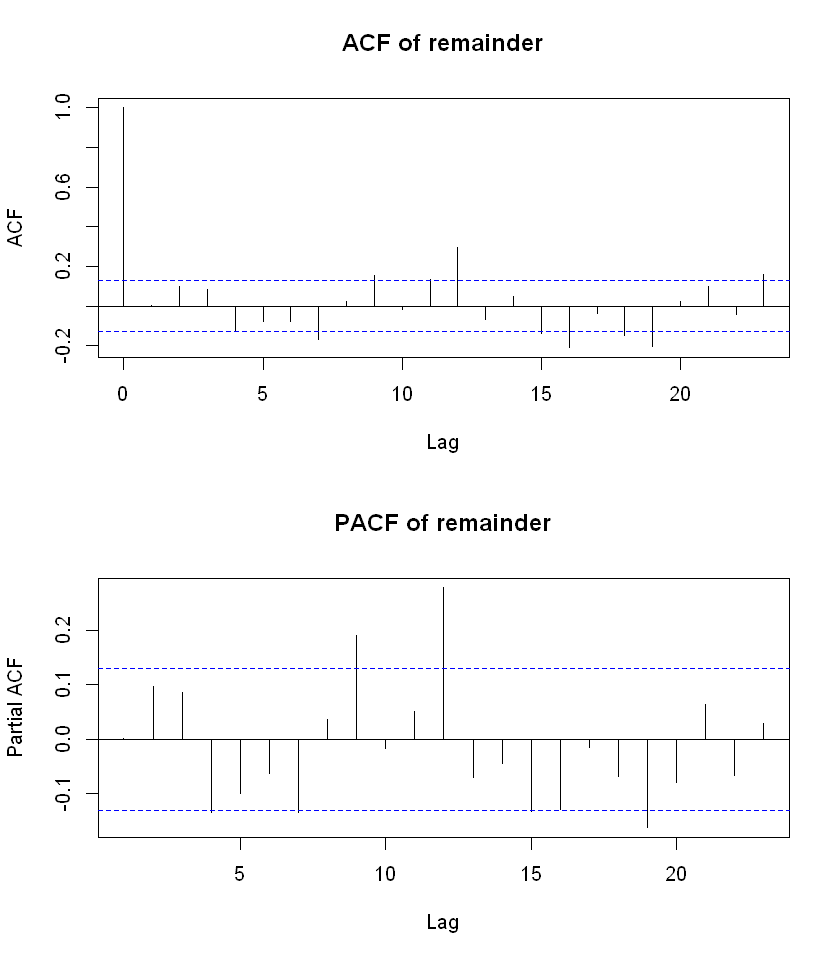

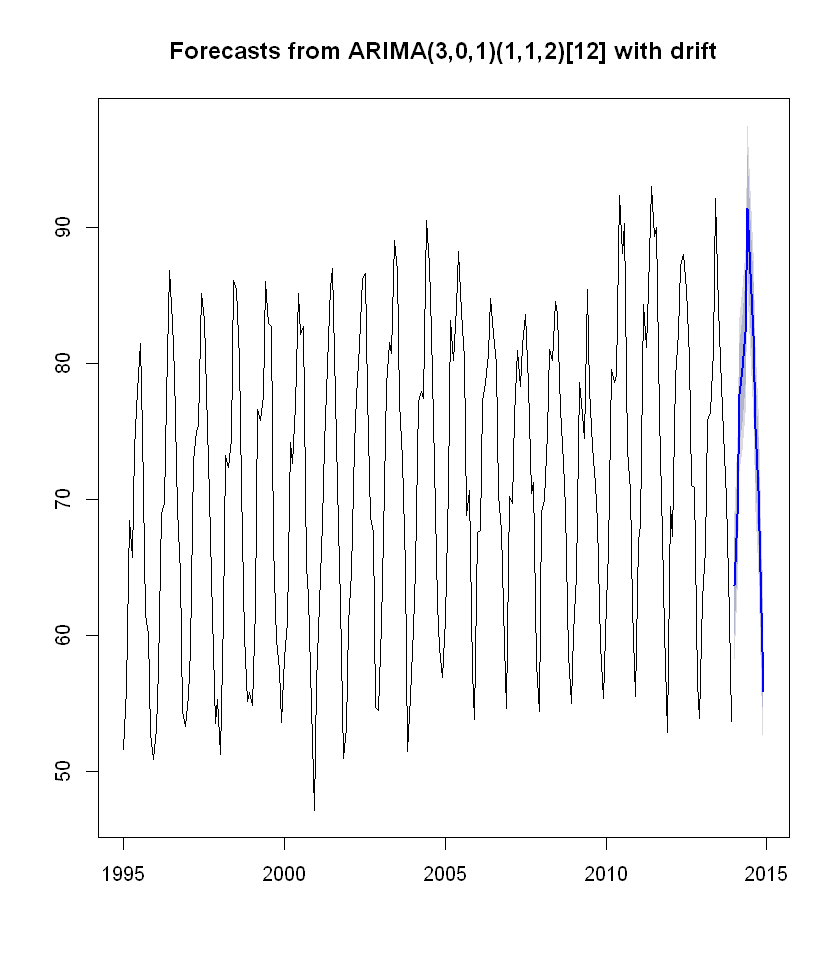

In [7]:
## ARIMA modeling
icrm.arima = ts.model(icrm.decomp[, 3], col = 'ARIMA model for ice cream', order = c(2,1,2))
plot.acf(icrm.arima$resid[-1], is.df = FALSE)

## Forecasting
fit.icrm = auto.arima(icrm, max.p=3, max.q=3,
                       max.P=2, max.Q=2, max.order=5, max.d=2, max.D=1,
                       start.p=0, start.q=0, start.P=0, start.Q=0)
summary(fit.icrm)

## Make the forecast for the next year
elect.forecast = forecast(fit.icrm, h=12)
summary(elect.forecast)
plot(elect.forecast)